# Linear Discriminant Analysis

## Define class LDA

In [ ]:
#Import library
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from typing import no_type_check_decorator
#Define the LDA class
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None
        self.class_means_trans = {}  # Lưu trữ trung bình lớp trong không gian LDA

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Tính toán S_W, S_B
        mean_overall = np.mean(X, axis=0)
        S_W = np.zeros((n_features, n_features))
        S_B = np.zeros((n_features, n_features))

        # Tính toán cho từng lớp
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            # Tính toán tổng S_W
            S_W += (X_c - mean_c).T.dot(X_c - mean_c)

            # Tính toán tổng S_B
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            S_B += n_c * (mean_diff).dot(mean_diff.T)

        # Tính toán giá trị riêng và vectơ riêng
        A = np.linalg.inv(S_W).dot(S_B)
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T

        # Sắp xếp giá trị riêng và vectơ riêng theo thứ tự giảm dần
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # Chọn các vectơ riêng tương ứng với số lượng thành phần đã chỉ định
        self.linear_discriminants = eigenvectors[0:self.n_components]

        # Tính toán dữ liệu đã biến đổi
        X_transformed = self.tranform(X)

        # Lưu trữ trung bình của từng lớp trong không gian LDA
        for c in class_labels:
            X_c_trans = X_transformed[y == c]
            self.class_means_trans[c] = np.mean(X_c_trans, axis=0)

    def tranform(self, X):
        return np.dot(X, self.linear_discriminants.T)

    def predict(self, X):
        # Biến đổi dữ liệu vào không gian LDA
        transformed_X = self.tranform(X)

        # Dự đoán dựa trên khoảng cách Euclid đến trung bình các lớp
        predictions = []
        for sample in transformed_X:
            distances = [np.linalg.norm(sample - self.class_means_trans[c]) for c in self.class_means_trans]
            predicted_class = min(self.class_means_trans, key=lambda c: np.linalg.norm(sample - self.class_means_trans[c]))
            predictions.append(predicted_class)
        return np.array(predictions)

## LDA for reducing dimensions

### LDA with two_blobs dataset

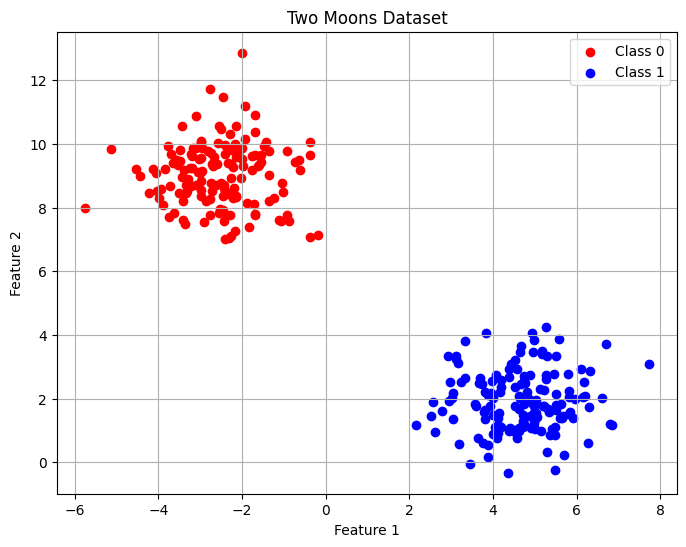

In [ ]:
from sklearn.datasets import make_blobs

  X, y = make_blobs(n_samples=300, centers=2, n_features=2, random_state=42)
  # Hiển thị bộ dữ liệu bằng biểu đồ scatter
  plt.figure(figsize=(8, 6))
  plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
  plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
  plt.title('Two Moons Dataset')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.legend()
  plt.grid(True)
  plt.show()

#### Step By Step

In [ ]:
u1=np.mean(X[y==0],axis=0)
u1

array([-2.55143224,  9.02835242])

In [ ]:
u2=np.mean(X[y==1],axis=0)
u2

array([4.66375945, 1.92025297])

In [ ]:
X_class_0 = X[y == 0]
s1 = np.zeros((X.shape[1], X.shape[1]))
centered_X = X_class_0 - u1

# Sử dụng np.dot() để tính ma trận hiệp phương sai
s1 = np.dot(centered_X.T, centered_X) / (X_class_0.shape[1] - 1)
s1

array([[140.14113936,  -2.13704509],
       [ -2.13704509, 148.1204539 ]])

In [ ]:
X_class_1=X[y==1]
s2=np.zeros((X.shape[1],X.shape[1]))
centered_X= X_class_1-u2

s2=np.dot(centered_X.T,centered_X)/(X_class_1.shape[1] - 1)
s2

array([[146.94373844,   5.87490001],
       [  5.87490001, 131.26255036]])

In [ ]:
S_w= s1+s2
S_w

array([[287.0848778 ,   3.73785492],
       [  3.73785492, 279.38300425]])

In [ ]:
U=u1-u2
S_b = np.dot(U.reshape(-1, 1), U.reshape(1, -1))
S_b

array([[ 52.05899107, -51.28630008],
       [-51.28630008,  50.52507785]])

In [ ]:
  S_W_inv = np.linalg.inv(S_w)
  M = np.dot(S_W_inv, S_b)
  eigenvalues, eigenvectors = np.linalg.eig(M)
print(f'Tri rieng: \n {eigenvalues} \n Vector rieng : \n{eigenvectors}')

Tri rieng: 
 [0.3670259 0.       ] 
 Vector rieng : 
[[ 0.70275345  0.70180028]
 [-0.71143347  0.71237376]]


In [ ]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# In vector riêng lớn nhất
print("Vector riêng tương ứng với trị riêng lớn nhất:")
print(sorted_eigenvectors[:, 0])

# Nếu có 2 vector riêng, ta có thể lấy 2 vector riêng đầu tiên
print("Vector riêng thứ 2:")
print(sorted_eigenvectors[:, 1])

Vector riêng tương ứng với trị riêng lớn nhất:
[ 0.70275345 -0.71143347]
Vector riêng thứ 2:
[0.70180028 0.71237376]


In [ ]:
X_LDA_Class0 = np.dot(X[y==0],sorted_eigenvectors[:, 0])
X_LDA_Class1 = np.dot(X[y==1],sorted_eigenvectors[:, 0])

In [ ]:

# Vector phương hướng (vector riêng đầu tiên)
lda_direction = sorted_eigenvectors[:, 0]


In [ ]:
# Tạo điểm trên trục LDA
x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_vals = (lda_direction[1] / lda_direction[0]) * (x_vals - u1[0]) + u1[1]  # Bắt đầu từ trung tâm lớp 0


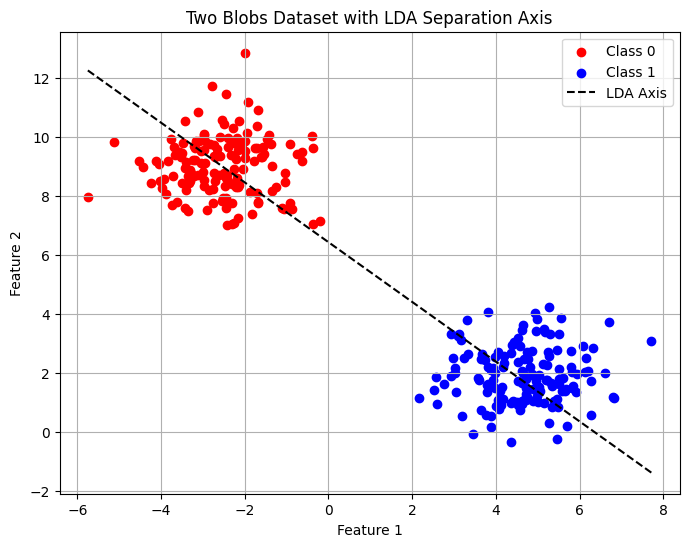

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
# Vẽ trục phân cách LDA
plt.plot(x_vals, y_vals, 'k--', label='LDA Axis')

# Đặt tiêu đề và hiển thị biểu đồ
plt.title('Two Blobs Dataset with LDA Separation Axis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

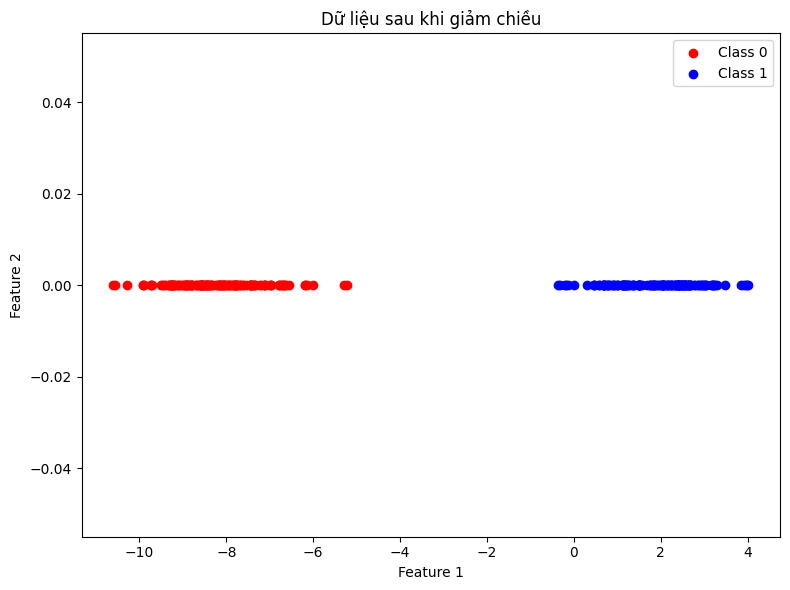

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_LDA_Class0[ : ], np.zeros(len(X_LDA_Class0)), color='red', label='Class 0')
plt.scatter(X_LDA_Class1[ : ],np.zeros(len(X_LDA_Class1)), color='blue', label='Class 1')
plt.title("Dữ liệu sau khi giảm chiều")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
# Hiển thị đồ thị
plt.tight_layout()
plt.show()

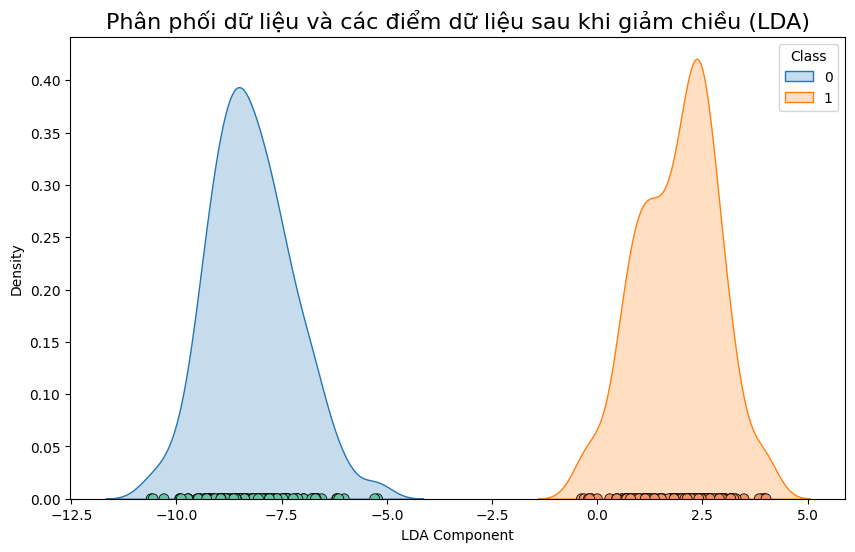

In [ ]:
# Giả sử bạn đã có X, y và sorted_eigenvectors từ LDA
w = sorted_eigenvectors[:, 0]  # Eigenvector đầu tiên (trục trọng số)

# Chiếu dữ liệu gốc lên trục trọng số
X_projected = np.dot(X, w)  # Chiếu dữ liệu lên trục trọng số

# Tạo DataFrame cho dữ liệu chiếu
lda_data = pd.DataFrame({
    'LDA Component': X_projected,  # Thành phần LDA đã chiếu
    'Class': y  # Nhãn lớp
})

# Đảm bảo rằng 'Class' là một loại phân loại (categorical)
lda_data['Class'] = lda_data['Class'].astype('category')

# Vẽ biểu đồ phân phối với kdeplot
plt.figure(figsize=(10, 6))

# KDE Plot (đường phân phối) - với 'clip' để giới hạn phạm vi của KDE
sns.kdeplot(
    data=lda_data,
    x="LDA Component",  # Trục LDA
    hue="Class",  # Màu sắc theo lớp
    fill=True,  # Làm đầy dưới các đường KDE
    common_norm=False,  # Tách biệt các lớp để không sử dụng chuẩn hóa chung
)

# Scatter Plot (Các điểm dữ liệu)
sns.scatterplot(
    data=lda_data,
    x="LDA Component",  # Trục LDA
    y=np.zeros_like(lda_data["LDA Component"]),  # Các điểm sẽ được vẽ tại y = 0
    hue="Class",  # Màu sắc theo lớp
    palette="Set2",  # Chọn bảng màu
    marker="o",  # Chọn hình dạng điểm
    edgecolor='black',  # Viền cho các điểm
    s=50,  # Kích thước điểm
    legend=False  # Tắt chú giải cho các điểm dữ liệu
)

# Thêm tiêu đề và hiển thị
plt.title("Phân phối dữ liệu và các điểm dữ liệu sau khi giảm chiều (LDA)", fontsize=16)
plt.xlabel("LDA Component")
plt.ylabel("Density")

plt.show()

#### Using Class

In [ ]:
LDA_two_blobs = LDA(1)
LDA_two_blobs.fit(X,y)
X_projected_two_blobs = LDA_two_blobs.tranform(X)
print(f'Shape of X: {X.shape}')
print(f'Shape of tranformed X: {X_projected_two_blobs.shape}')

Shape of X: (300, 2)
Shape of tranformed X: (300, 1)


In [ ]:
X_projected_two_blobs = X_projected_two_blobs.reshape(1, -1)
X_projected_two_blobs.shape

(1, 300)

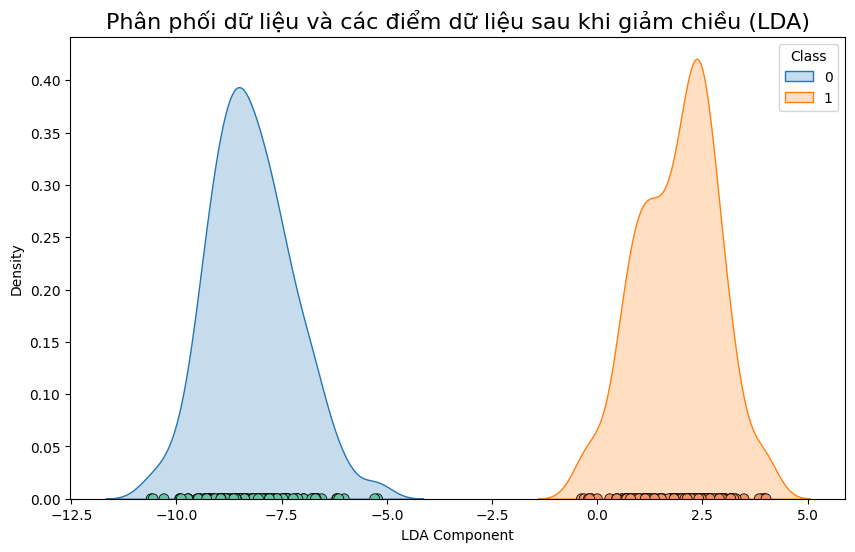

In [ ]:
# Giả sử bạn đã có X, y và sorted_eigenvectors từ LDA
w = sorted_eigenvectors[:, 0]  # Eigenvector đầu tiên (trục trọng số)

# Chiếu dữ liệu gốc lên trục trọng số
X_projected = np.dot(X, w)  # Chiếu dữ liệu lên trục trọng số

# Tạo DataFrame cho dữ liệu chiếu
lda_data = pd.DataFrame({
    'LDA Component': X_projected_two_blobs.flatten(),  # Thành phần LDA đã chiếu
    'Class': y  # Nhãn lớp
})

# Đảm bảo rằng 'Class' là một loại phân loại (categorical)
lda_data['Class'] = lda_data['Class'].astype('category')

# Vẽ biểu đồ phân phối với kdeplot
plt.figure(figsize=(10, 6))

# KDE Plot (đường phân phối) - với 'clip' để giới hạn phạm vi của KDE
sns.kdeplot(
    data=lda_data,
    x="LDA Component",  # Trục LDA
    hue="Class",  # Màu sắc theo lớp
    fill=True,  # Làm đầy dưới các đường KDE
    common_norm=False,  # Tách biệt các lớp để không sử dụng chuẩn hóa chung
    #linewidth=2,  # Độ dày của đường cong
    # Điều chỉnh bandwidth để làm cho KDE sắc nét hơn
    #clip=(lda_data["LDA Component"].min(), lda_data["LDA Component"].max())  # Giới hạn KDE trong phạm vi của dữ liệu
)

# Scatter Plot (Các điểm dữ liệu)
sns.scatterplot(
    data=lda_data,
    x="LDA Component",  # Trục LDA
    y=np.zeros_like(lda_data["LDA Component"]),  # Các điểm sẽ được vẽ tại y = 0
    hue="Class",  # Màu sắc theo lớp
    palette="Set2",  # Chọn bảng màu
    marker="o",  # Chọn hình dạng điểm
    edgecolor='black',  # Viền cho các điểm
    s=50,  # Kích thước điểm
    legend=False  # Tắt chú giải cho các điểm dữ liệu
)

# Thêm tiêu đề và hiển thị
plt.title("Phân phối dữ liệu và các điểm dữ liệu sau khi giảm chiều (LDA)", fontsize=16)
plt.xlabel("LDA Component")
plt.ylabel("Density")

plt.show()

### LDA with iris dataset

In [ ]:
#Import libraries
from sklearn import datasets
import matplotlib.pyplot as plt

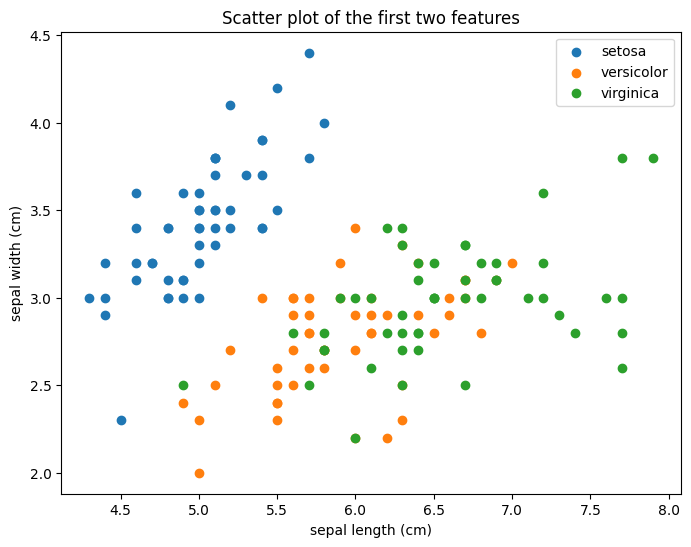

In [ ]:
#Load dataset
data = datasets.load_iris()
  X = data.data
  y = data.target
  feature_names = data.feature_names
  target_names = data.target_names

#Visualize the data following first two features
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=target_name)
plt.title("Scatter plot of the first two features")
plt.xlabel(feature_names[0])  #Sepal length
plt.ylabel(feature_names[1])  #Sepal width
plt.legend()
plt.show()

In [ ]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Visualizing data before reduce dimensions

In [ ]:

df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['species'] = data.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})



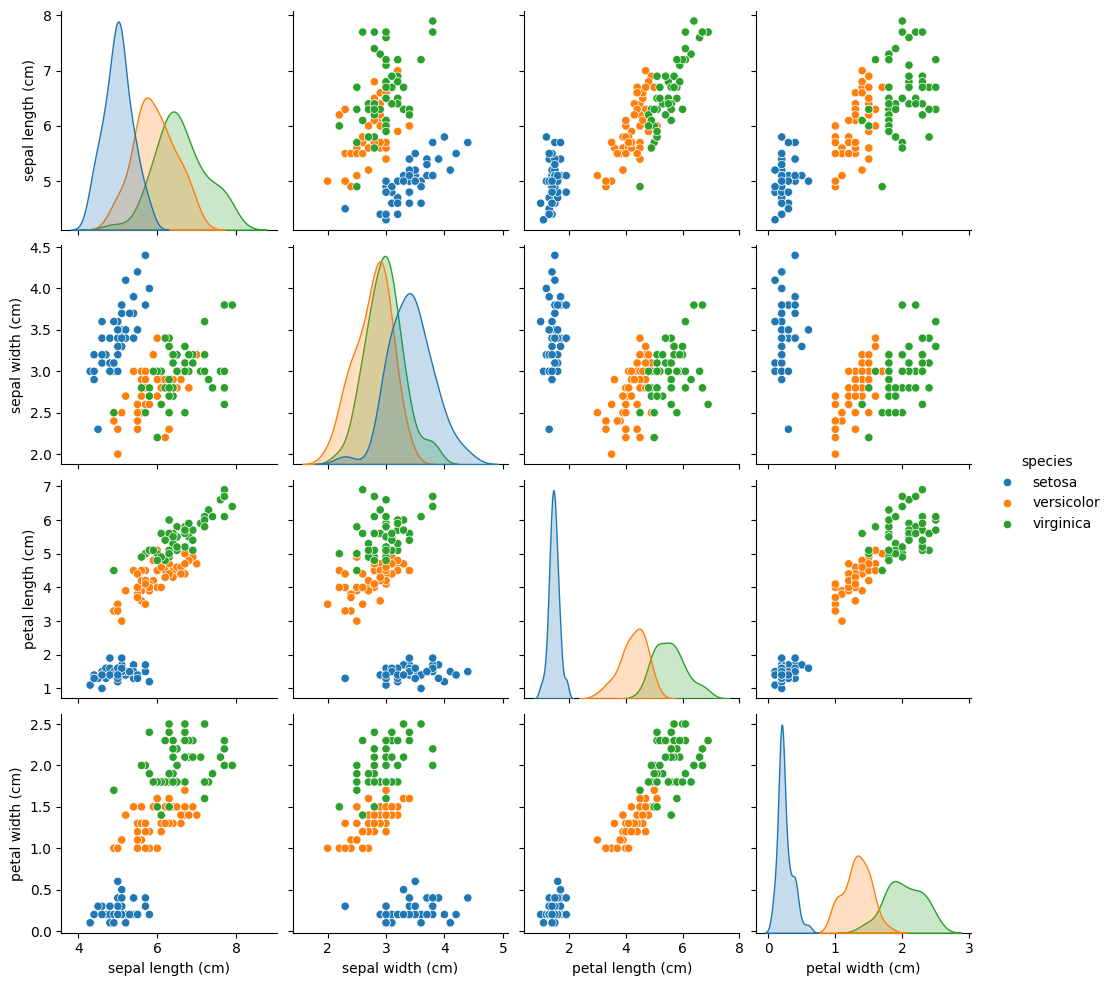

In [ ]:
# Pairplot
sns.pairplot(data=df, hue='species', diag_kind='kde')

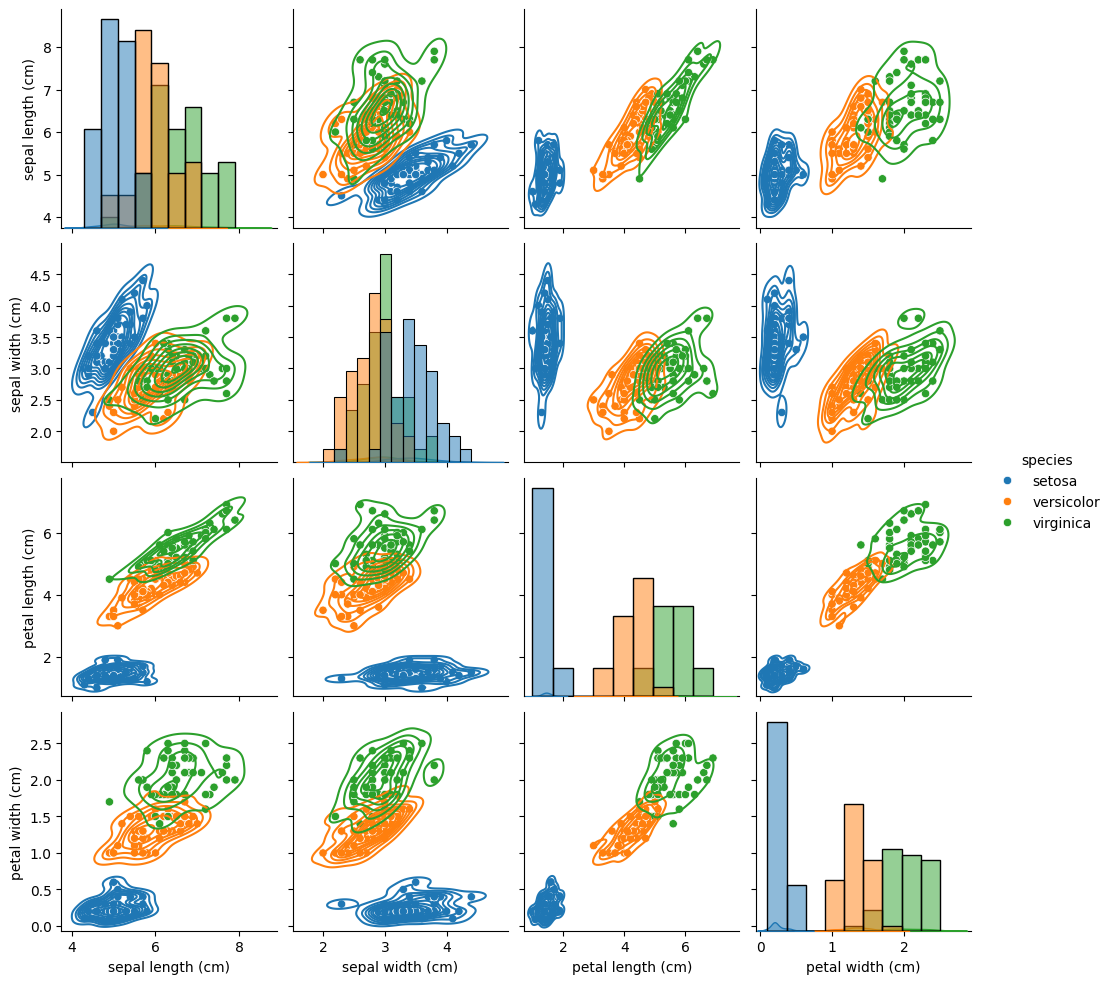

In [ ]:
sns.pairplot(data = df,hue = 'species').map_diag(sns.histplot).map_lower(sns.kdeplot).map_upper(sns.kdeplot)

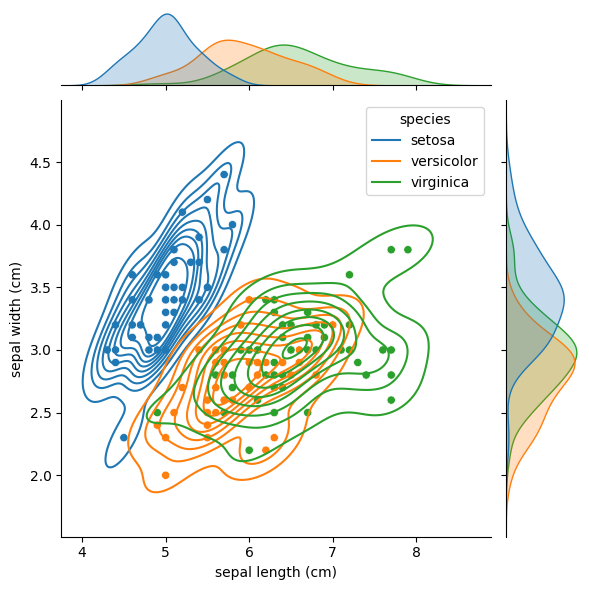

In [ ]:
g= sns.jointplot(data=df,x='sepal length (cm)',y='sepal width (cm)',hue = 'species')
g.plot_joint(sns.kdeplot)

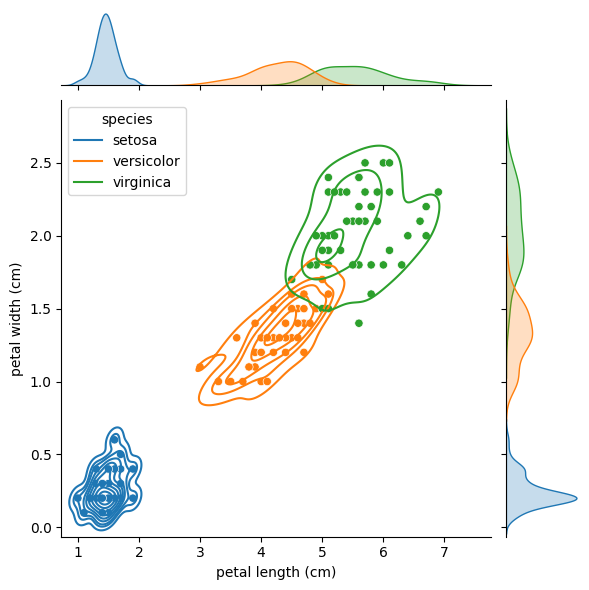

In [ ]:
g= sns.jointplot(data=df,x='petal length (cm)',y='petal width (cm)',hue = 'species')
g.plot_joint(sns.kdeplot)

<Axes: xlabel='species', ylabel='sepal length (cm)'>

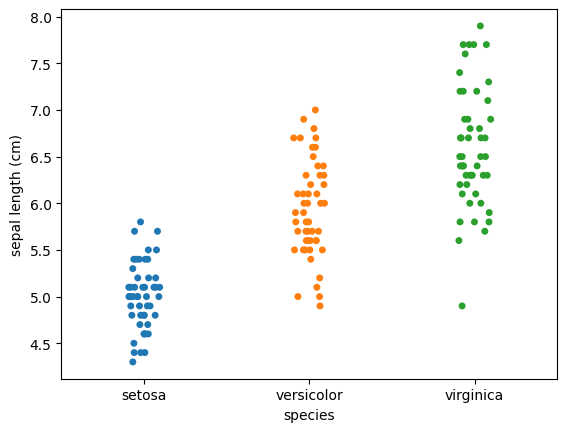

In [ ]:
sns.stripplot(data=df, x='species', y='sepal length (cm)', hue = 'species', jitter=True)

<Axes: xlabel='species', ylabel='petal length (cm)'>

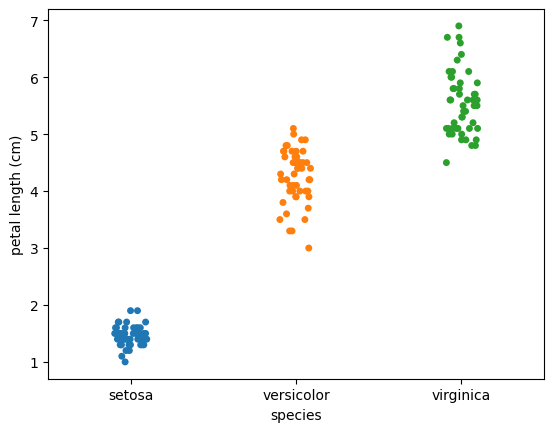

In [ ]:
sns.stripplot(data=df, x='species', y='petal length (cm)', hue = 'species', jitter=True)

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


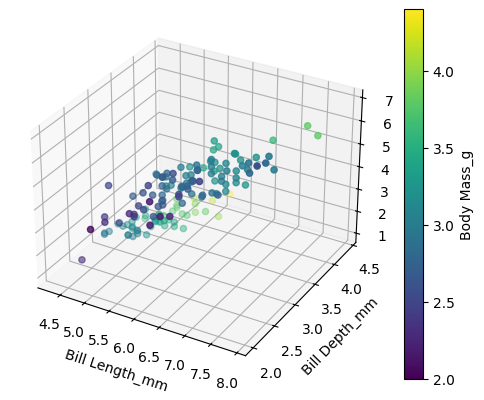

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
sc = ax.scatter(df['sepal length (cm)'], df['sepal width (cm)'], df['petal length (cm)'], c=df['sepal width (cm)'], cmap='viridis', marker='o')
cbar = plt.colorbar(sc)
cbar.set_label('Body Mass_g')
ax.set_xlabel('Bill Length_mm')
ax.set_ylabel('Bill Depth_mm')
ax.set_zlabel('Flipper Length_mm')
plt.show()

#### Reducing dimensions

In [ ]:
#Use lda with 1 components
lda = LDA(1)
lda.fit(X,y)
X_projected = lda.tranform(X)
print(f'Shape of X: {X.shape}')
print(f'Shape of tranformed X: {X_projected.shape}')

Shape of X: (150, 4)
Shape of tranformed X: (150, 1)


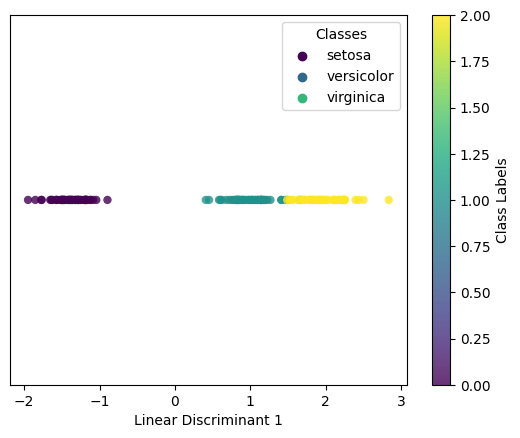

In [ ]:
plt.scatter(X_projected, [0] * len(X_projected), c=y, edgecolor='none', alpha=0.8, cmap='viridis', vmin=0, vmax=2)

plt.xlabel('Linear Discriminant 1')
plt.colorbar(label="Class Labels")
plt.yticks([])

colors = [plt.cm.viridis(i / 3) for i in range(len(target_names))]

for cls, color in zip(target_names, colors):
    plt.scatter([], [], c=[color], label=cls)

plt.legend(title="Classes")
plt.show()

In [ ]:
#Use lda with 2 components
lda = LDA(2)
lda.fit(X,y)
X_projected = lda.tranform(X)
print(f'Shape of X: {X.shape}')
print(f'Shape of tranformed X: {X_projected.shape}')

Shape of X: (150, 4)
Shape of tranformed X: (150, 2)


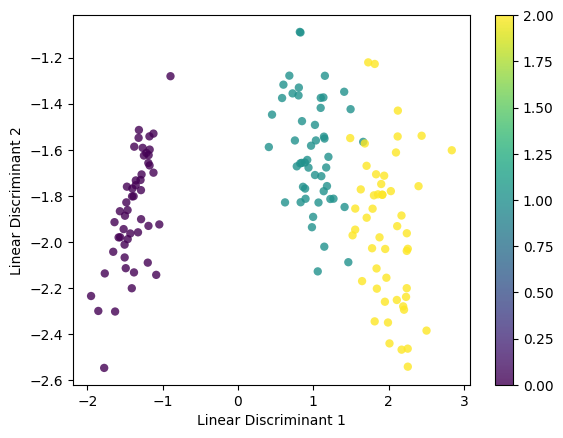

In [ ]:
#Visualize the projected X
x1_tran = X_projected[:,0]
x2_tran = X_projected[:,1]
plt.colormaps['viridis']
plt.scatter(x1_tran, x2_tran, c=y, edgecolor='none', alpha=0.8)

plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()
plt.show()


## LDA for classification

### Iris datasets

In [ ]:
#Import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification

In [ ]:
# Tải bộ dữ liệu Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Chia dữ liệu thành bộ huấn luyện và bộ kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Khởi tạo và huấn luyện mô hình LDA
lda = LDA(n_components=2)
lda.fit(X_train, y_train)

# Dự đoán với mô hình đã huấn luyện
y_pred = lda.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Chia dữ liệu thành bộ huấn luyện và bộ kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Khởi tạo và huấn luyện mô hình LDA
lda = LDA(n_components=2)
lda.fit(X_train, y_train)

# Dự đoán với mô hình đã huấn luyện
y_pred = lda.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95


In [ ]:
import seaborn as sns
import pandas as pd

# Tải bộ dữ liệu penguins từ seaborn
penguins = sns.load_dataset("penguins")

# Hiển thị thông tin bộ dữ liệu
print(penguins.head())  # Hiển thị 5 dòng đầu tiên
print(penguins.info())  # Thông tin về các cột

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_

In [ ]:
# Kiểm tra giá trị null
print(penguins.isnull().sum())

# Loại bỏ các dòng chứa giá trị thiếu
penguins = penguins.dropna()

print(penguins.info())


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB
None


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Chọn các đặc trưng và nhãn
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
X = X.to_numpy()
y = penguins['species']

# Sử dụng LabelEncoder để mã hóa
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Chia tập dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)
print(X_train)

Train size: (266, 4)
Test size: (67, 4)
[[  40.9   13.7  214.  4650. ]
 [  37.3   17.8  191.  3350. ]
 [  50.    15.9  224.  5350. ]
 ...
 [  39.7   17.7  193.  3200. ]
 [  45.5   15.   220.  5000. ]
 [  38.1   17.   181.  3175. ]]


In [ ]:
# Khởi tạo và huấn luyện mô hình LDA
lda = LDA(n_components=2)
lda.fit(X_train, y_train)

# Dự đoán với mô hình đã huấn luyện
y_pred = lda.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [ ]:
# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize and train the LDA model
lda = LDA(2)
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))
print("Classification Report:\n", classification_report(y_test, y_pred_lda))

LDA Accuracy: 0.82
Confusion Matrix:
 [[ 70   6  25]
 [ 13  74   0]
 [  1   9 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.69      0.76       101
           1       0.83      0.85      0.84        87
           2       0.80      0.91      0.85       112

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



# Quadratic Discriminant Analysis




In [ ]:
  import numpy as np

  class QDA:
      def __init__(self):
          self.means = None  # Mean vectors cho mỗi lớp
          self.covariances = None  # Ma trận phương sai-covariance cho mỗi lớp
          self.priors = None  # Prior probabilities của mỗi lớp
          self.classes = None  # Các lớp (class labels)

      def fit(self, X, y):
          # Xác định số lớp và số đặc trưng
          self.classes = np.unique(y)
          n_features = X.shape[1]
          n_samples = X.shape[0]

          # Khởi tạo các thông số
          self.means = {}
          self.covariances = {}
          self.priors = {}

          # Tính toán mean vector, covariance matrix và priors cho mỗi lớp
          for c in self.classes:
              X_c = X[y == c]  # Lấy các mẫu thuộc lớp c
              self.means[c] = np.mean(X_c, axis=0)  # Mean vector của lớp c
              self.covariances[c] = np.cov(X_c.T)  # Ma trận covariance của lớp c
              self.priors[c] = X_c.shape[0] / n_samples  # Tính prior probability của lớp c

      def predict(self, X):
          predictions = []

          # Dự đoán cho mỗi mẫu trong X
          for sample in X:
              class_probs = []

              # Tính toán xác suất posterior cho mỗi lớp
              for c in self.classes:
                  mean = self.means[c]
                  cov = self.covariances[c]
                  prior = self.priors[c]

                  # Tính toán hàm phân phối chuẩn đa biến
                  inv_cov = np.linalg.inv(cov)  # Ma trận nghịch đảo của covariance
                  diff = sample - mean
                  exponent = -0.5 * diff.T @ inv_cov @ diff  # Exponent trong hàm Gaussian
                  norm_const = np.sqrt((2 * np.pi) ** len(mean) * np.linalg.det(cov))  # Phần chuẩn hóa

                  # Tính xác suất (posterior probability)
                  prob = np.exp(exponent) / norm_const
                  class_probs.append(prior * prob)  # Multiply by prior

              # Dự đoán lớp có xác suất cao nhất
              predictions.append(self.classes[np.argmax(class_probs)])

          return np.array(predictions)

      def predict_proba(self, X):
          probas = []

          # Tính toán xác suất cho mỗi lớp
          for sample in X:
              class_probs = []

              for c in self.classes:
                  mean = self.means[c]
                  cov = self.covariances[c]
                  prior = self.priors[c]

                  inv_cov = np.linalg.inv(cov)
                  diff = sample - mean
                  exponent = -0.5 * diff.T @ inv_cov @ diff
                  norm_const = np.sqrt((2 * np.pi) ** len(mean) * np.linalg.det(cov))

                  prob = np.exp(exponent) / norm_const
                  class_probs.append(prior * prob)

              probas.append(class_probs)

          return np.array(probas)

## Iris dataset

In [ ]:
# Tải bộ dữ liệu Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the QDA model
qda_model = QDA()
qda_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = qda_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


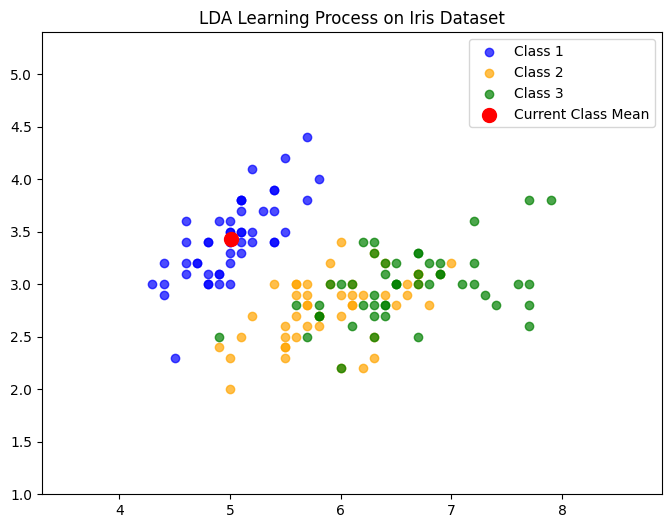

In [ ]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import load_iris
from IPython.display import HTML

class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None
        self.frames = []

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Compute overall mean
        mean_overall = np.mean(X, axis=0)
        S_W = np.zeros((n_features, n_features))
        S_B = np.zeros((n_features, n_features))

        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)

            # Update S_W and S_B
            S_W += (X_c - mean_c).T.dot(X_c - mean_c)
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            S_B += n_c * mean_diff.dot(mean_diff.T)

            # Capture intermediate steps for animation
            self.frames.append((X.copy(), S_W.copy(), S_B.copy(), mean_c.copy()))

        # Solve generalized eigenvalue problem
        A = np.linalg.inv(S_W).dot(S_B)
        eigenvalues, eigenvectors = np.linalg.eig(A)

        # Sort eigenvectors by eigenvalues
        idxs = np.argsort(abs(eigenvalues))[::-1]
        self.linear_discriminants = eigenvectors.T[idxs][:self.n_components]

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)

# Animation plotting function
def plot_frame(frame, ax, y):
    X, S_W, S_B, mean_c = frame
    ax.clear()

    # Scatter plot of data points, colored by class
    class_colors = ['blue', 'orange', 'green']
    for c in np.unique(y):
        X_c = X[y == c]
        ax.scatter(X_c[:, 0], X_c[:, 1], alpha=0.7, label=f"Class {c+1}", color=class_colors[c])

    # Highlight evolving class means
    ax.scatter(mean_c[0], mean_c[1], color="red", label="Current Class Mean", s=100)

    # Set plot labels and limits
    ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
    ax.set_title("LDA Learning Process on Iris Dataset")
    ax.legend()

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Use only two features for visualization
X = X[:, :2]  # Take the first two features

# Fit LDA and capture frames
lda = LDA(n_components=1)
lda.fit(X, y)

# Create animation
fig, ax = plt.subplots(figsize=(8, 6))
anim = FuncAnimation(fig, lambda i: plot_frame(lda.frames[i], ax, y), frames=len(lda.frames), repeat=False)


HTML(anim.to_jshtml())